In [1]:
from visualization_fct import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import scale

# from bokeh.plotting import output_file, show, save
# from bokeh.mpl import to_bokeh

from bokeh.resources import CDN
from bokeh.embed import file_html
from bokeh.plotting import output_notebook, show, output_file
output_notebook()

import matplotlib.pyplot as plt  # , mpld3
import pyfits
%matplotlib notebook

np.random.seed(0)

# for now, no ratio in data (no rates A, B or C in this dataset)

only_flux = False
scale_data = False

hdulist = pyfits.open('../iirc_data/all_data_for_ml.fits')
data = hdulist[1].data

#data=data[500:]

X_flux, X, data_thr, data_fr_en = get_iirc_data(
    data, only_flux=only_flux, scale_data=scale_data, thresholded=True)[:4]

mjd_iirc = (data_thr['tstart'] + data_thr['tstop']) / 2.

Loading BokehJS ...

In [2]:
data_fr_en.shape
X_flux[:, :78].shape

(1112, 78)

In [3]:
X_flux[:, :78] = np.divide(X_flux[:, :78], (data_fr_en * 1000))

In [4]:
bin_size = (15 - 2.1) / 78
ind_high_A = int((3 - 2.1) / bin_size) + 1
print 2.1 + ind_high_A * bin_size
ind_low_C = int((5 - 2.1) / bin_size) + 1
print 2.1 + ind_low_C * bin_size
ind_high_C = int((12 - 2.1) / bin_size) + 1
print 2.1 + ind_high_C * bin_size

3.09230769231
5.07692307692
12.0230769231


In [5]:
rA = X_flux[:, :(ind_high_A+1)].sum(axis=1)
rC = X_flux[:, ind_low_C:].sum(axis=1)
r = X_flux[:, :].sum(axis=1)
rCA = rC / rA

<IPython.core.display.Javascript object>


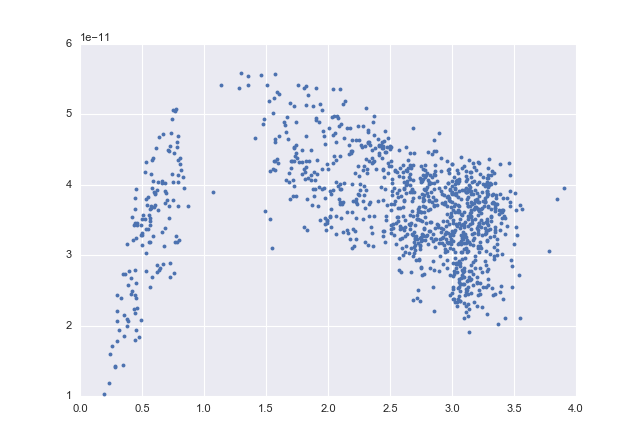

In [6]:
plt.figure()
plt.plot(rCA, r, '.')
plt.show()

In [7]:
print(r)


[  3.13781298e-11   3.06343740e-11   3.00648667e-11 ...,   3.79670246e-11
   3.65381446e-11   1.78724022e-11]


<IPython.core.display.Javascript object>


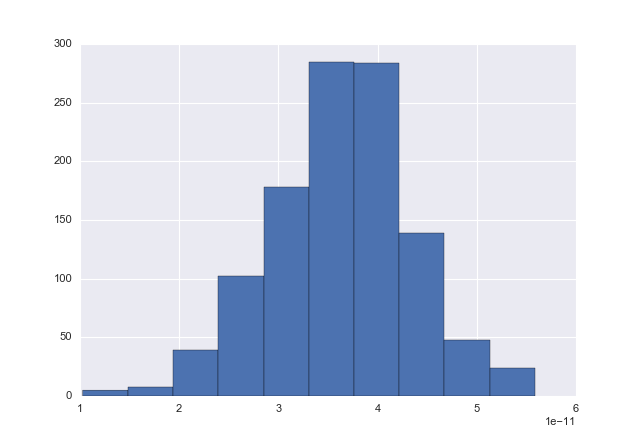

(array([   5.,    8.,   39.,  102.,  178.,  285.,  284.,  139.,   48.,   24.]),
 array([  1.02808585e-11,   1.48368473e-11,   1.93928361e-11,
          2.39488248e-11,   2.85048136e-11,   3.30608024e-11,
          3.76167912e-11,   4.21727800e-11,   4.67287688e-11,
          5.12847575e-11,   5.58407463e-11]),
 <a list of 10 Patch objects>)

In [8]:
plt.figure()
plt.hist(r)

In [9]:
data = pd.read_csv("../asm_data/asm_data_for_ml.txt", sep='\t')
mjd_asm = data['MJD']
data['rateCA'] = data.rateC / data.rateA
data_thr = mask(data, 'orbit')  # rm too large values except for 'orbit'

<IPython.core.display.Javascript object>


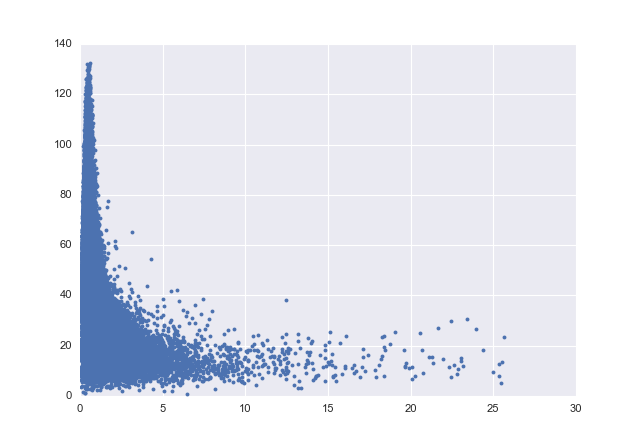

In [10]:
plt.figure()
plt.plot(data_thr.rateCA, data_thr.rate, '.')

<IPython.core.display.Javascript object>


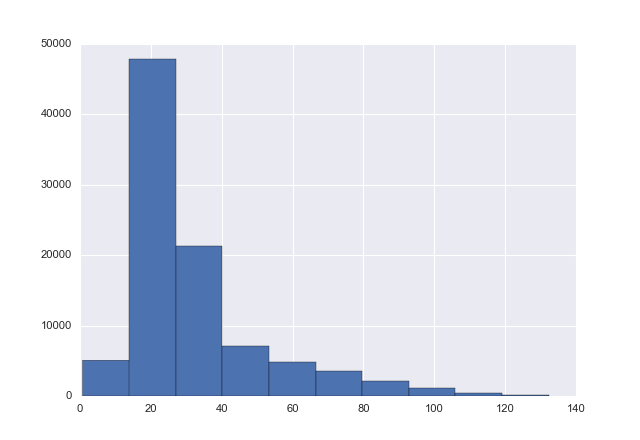

(array([  5076.,  47802.,  21326.,   7082.,   4774.,   3564.,   2122.,
          1135.,    457.,    116.]),
 array([   0.73 ,   13.882,   27.034,   40.186,   53.338,   66.49 ,
          79.642,   92.794,  105.946,  119.098,  132.25 ]),
 <a list of 10 Patch objects>)

In [11]:
plt.figure()
plt.hist(data_thr.rate)

<IPython.core.display.Javascript object>


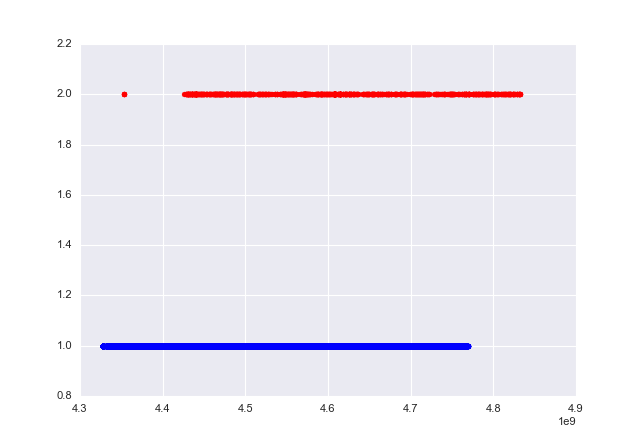

In [12]:
plt.figure()
plt.scatter(mjd_asm * 86400.0, np.ones_like(mjd_asm), color='blue')  # , normed=True)
plt.scatter(mjd_iirc * 86400.0, np.ones_like(mjd_iirc)*2., color='red');  # , normed=True)

In [13]:
A = np.zeros((mjd_asm.shape[0], mjd_iirc.shape[0]))
for j in range(mjd_iirc.shape[0]):
    A[:, j] = np.abs(mjd_asm - mjd_iirc[j]) < 360. / 86400

In [24]:
n_asm = 0
for k in range(mjd_asm.shape[0]):
    n_asm += int(A[k, :].sum() > 0)
    
n_iirc = 0
for k in range(mjd_iirc.shape[0]):
    n_iirc += int(A[:, k].sum() > 0)
print n_asm, n_iirc

536